In [3]:
#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 10,7

# импортируем нужные библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import plotly
import numpy as np
import seaborn as sns

# загружаем данные
data = pd.read_csv('https://raw.githubusercontent.com/FBosler/AdvancedPlotting/master/combined_set.csv')
# присваиваем метки каждому году 
data['Mean Log GDP per capita']  = data.groupby('Year')['Log GDP per capita'].transform(
    pd.qcut,
    q=5,
    labels=(['Lowest','Low','Medium','High','Highest'])
)

In [8]:
data.head()

,Year,Country name,ISO3,Continent,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Gapminder Life Expectancy,Gapminder Population,Mean Log GDP per capita
0,2007,Afghanistan,AFG,Asia,3.723590,7.168690,0.450662,50.799999,0.718114,0.177889,0.881686,0.517637,0.258195,0.612072,-1.929690,-1.655084,55.2,27300000.0,Lowest
1,2008,Afghanistan,AFG,Asia,3.723590,7.168690,0.450662,50.799999,0.718114,0.177889,0.881686,0.517637,0.258195,0.612072,-1.929690,-1.655084,55.2,27300000.0,Lowest
2,2009,Afghanistan,AFG,Asia,4.401778,7.333790,0.552308,51.200001,0.678896,0.200178,0.850035,0.583926,0.237092,0.611545,-2.044093,-1.635025,55.7,28000000.0,Lowest
3,2010,Afghanistan,AFG,Asia,4.758381,7.386629,0.539075,51.599998,0.600127,0.134353,0.706766,0.618265,0.275324,0.299357,-1.991810,-1.617176,56.2,28800000.0,Lowest
4,2011,Afghanistan,AFG,Asia,3.831719,7.415019,0.521104,51.919998,0.495901,0.172137,0.731109,0.611387,0.267175,0.307386,-1.919018,-1.616221,56.7,29700000.0,Lowest


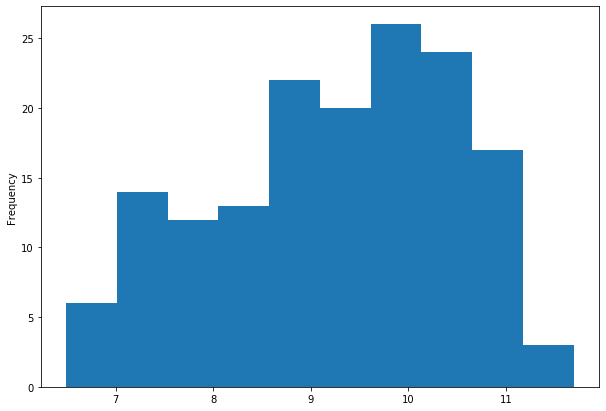

In [14]:
#Гистограмма распределения стран в 2018 по ВВП на душу населения
data[data['Year']==2018]['Log GDP per capita'].plot(kind='hist')

In [33]:
data[data['Year'] == 2018].set_index('Country name')['Life Ladder']

Country name
Afghanistan    2.694303
Albania        5.004403
Algeria        5.043086
Angola         3.794838
Argentina      5.792797
                 ...   
Venezuela      5.005663
Vietnam        5.295547
Yemen          3.057514
Zambia         4.041488
Zimbabwe       3.616480
Name: Life Ladder, Length: 158, dtype: float64

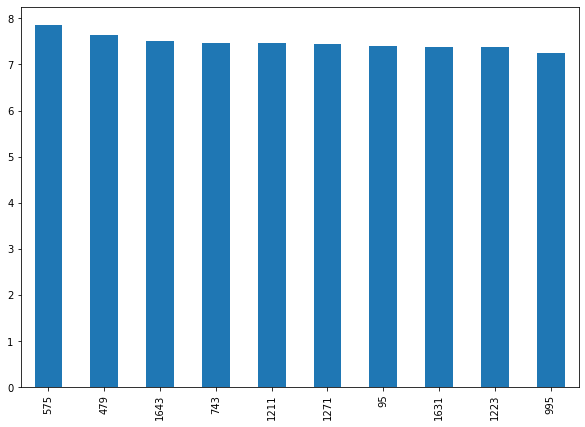

In [22]:
country_happy = data[data['Year'] == 2018].sort_values('Life Ladder', ascending=False).head(10)
country_happy.set_index('Country name')['Life Ladder'].plot(kind='bar')

Text(0, 0.5, 'Life Ladder')

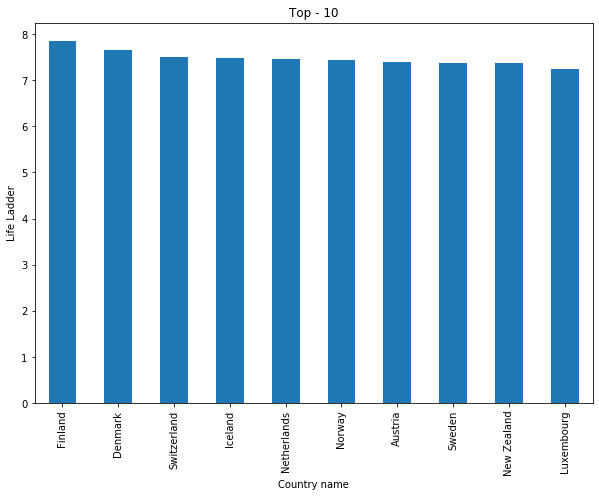

In [27]:
# Топ 10 стран по уровню счастья
ax = data[data['Year'] == 2018].set_index('Country name')['Life Ladder'].nlargest(10).plot(kind='bar')
ax.set_title('Top - 10')
ax.set_xlabel('Country name')
ax.set_ylabel('Life Ladder')

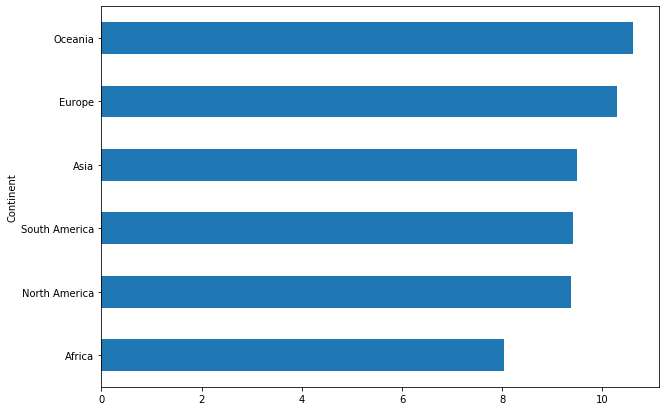

In [40]:
# Cредний ВВП на душу населения по континентам
# data[data['Year'] == 2018].groupby('Continent')['Log GDP per capita'].mean().sort_values()
data[data['Year'] == 2018].groupby('Continent')['Log GDP per capita'].mean().sort_values().plot(kind='barh')

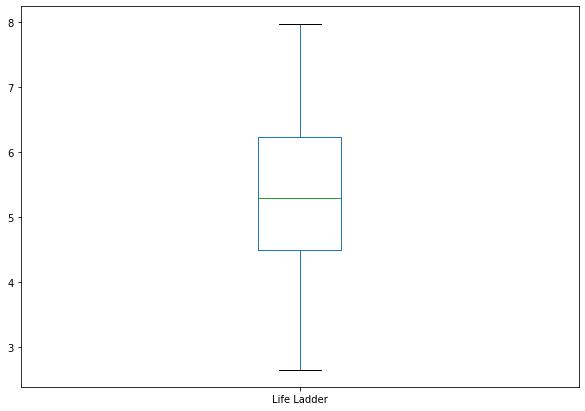

In [41]:
# Ящик с усами (Box plot)
data['Life Ladder'].plot(kind='box')

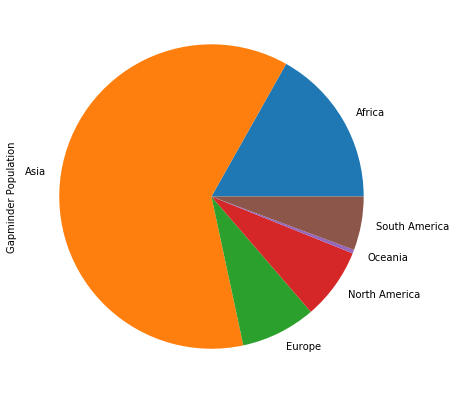

In [42]:
# Kоличество жителей по континентам
data[data['Year'] == 2018].groupby(['Continent'])['Gapminder Population'].sum().plot(kind='pie')

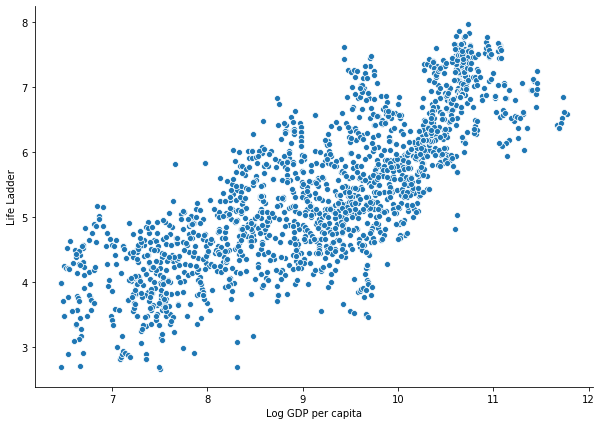

In [44]:
# Зависимость счастья от денег
sns.scatterplot(
    x='Log GDP per capita',
    y='Life Ladder',
    data=data,    
    )

sns.despine() 

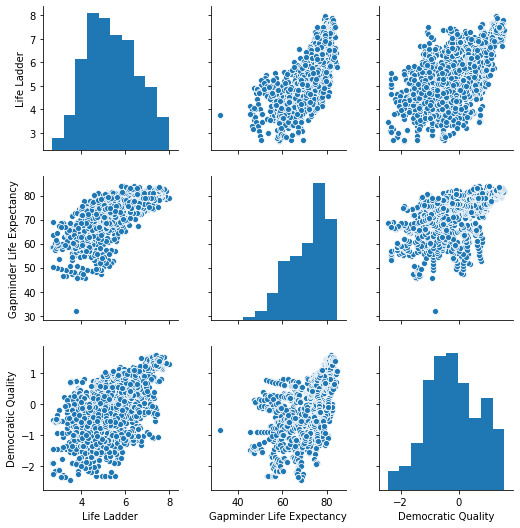

In [45]:
sns_plot = sns.pairplot(
    data[['Life Ladder', 'Gapminder Life Expectancy', 'Democratic Quality']])
sns_plot

C:\Users\AAZam\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\AAZam\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


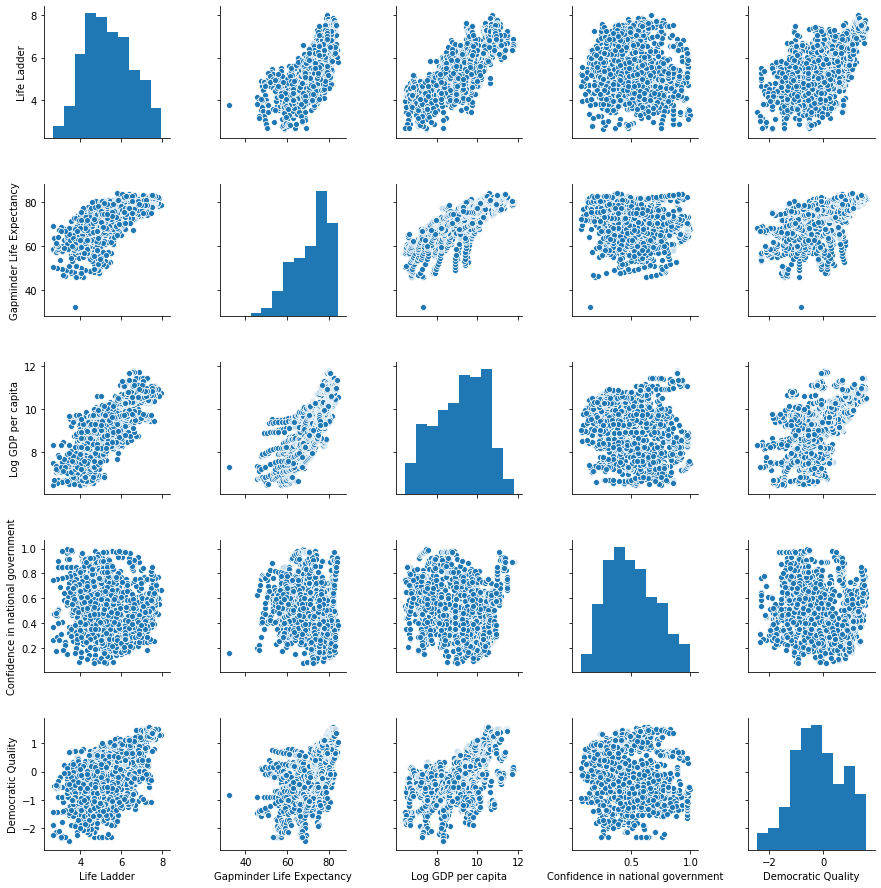

In [46]:
# Сильная кореляция счастья с продолжительность жизни и ВВП на душу населения
sns_plot = sns.pairplot(
    data[['Life Ladder', 'Gapminder Life Expectancy', 'Log GDP per capita', 'Confidence in national government', 'Democratic Quality']])
sns_plot